In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('./img/taekwonv1.jpg')
ksize = 30
win_title = 'mosaic'

while True:
    x,y,w,h = cv2.selectROI(win_title, img, False)
    if w>0 and h>0:
        roi = img[y:y+h, x:x+w]
        roi = cv2.blur(roi, (ksize, ksize))
        img[y:y+h, x:x+w] = roi
        cv2.imshow(win_title, img)
    else:
        break
cv2.waitKey(0)
cv2.destroyAllWindows()

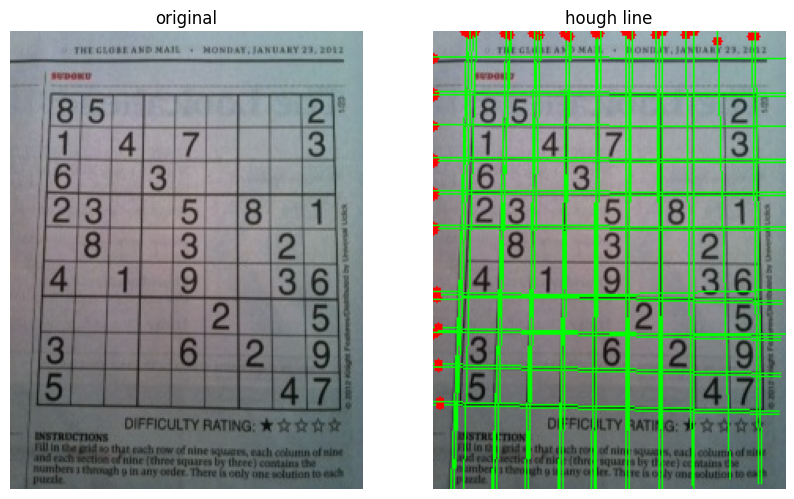

In [4]:
img = cv2.imread('../Day5/img/sudoku.jpg')
#img = cv2.imread('./img/sudoku.jpg')
img2 = img.copy()
h,w =img.shape[:2]

imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(imgray, 100, 100)

lines = cv2.HoughLines(edges, 1, np.pi/180, 130)
for line in lines:
    r, theta = line[0]    # 거리와 각도 w, h
    tx, ty = np.cos(theta), np.sin(theta)   # x, y축에 대한 삼각비 활용
    x0, y0 = tx*r, ty*r   # x, y 평면에서의 절편
    # 기준 좌표에 빨간원
    cv2.circle(img2, (int(abs(x0)), int(abs(y0))), 3, (0,0,255),-1)
    # 직선의 방정식으로 그리기 위한 두개의 점(시작점과 끝점)
    x1, y1 = int(x0 + w * (-ty)), int(y0 + h * tx)
    x2, y2 = int(x0 - w * (-ty)), int(y0 - h * tx)
    # 선 그리기
    cv2.line(img2, (x1,y1), (x2,y2), (0,255,0), 1)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10,6))
plt.subplot(121), plt.axis('off'), plt.imshow(img), plt.title('original')
plt.subplot(122), plt.axis('off'), plt.imshow(img2), plt.title('hough line')
plt.show()

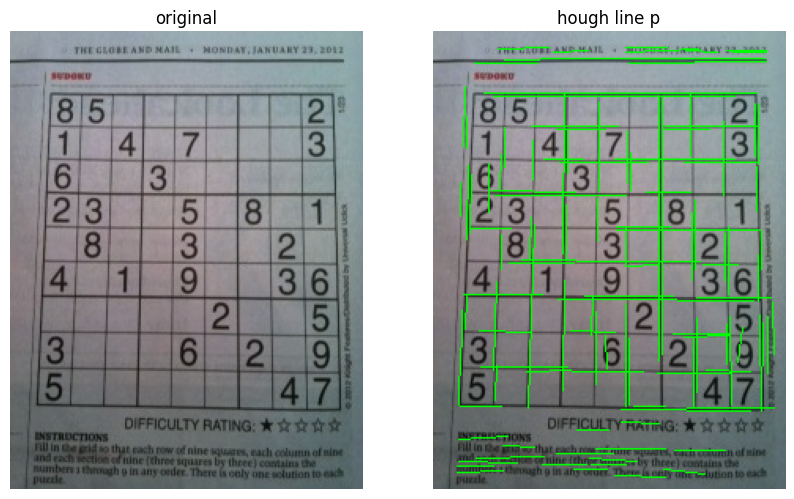

In [7]:
img = cv2.imread('./img/sudoku.jpg')
img2 = img.copy()
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(imgray, 50, 200)

lines = cv2.HoughLinesP(edges, 1, np.pi/180,
                        10, None, 20, 2)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img2, (x1,y1), (x2,y2), (0,255,0), 1)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10,6))
plt.subplot(121), plt.axis('off'), plt.imshow(img), plt.title('original')
plt.subplot(122), plt.axis('off'), plt.imshow(img2), plt.title('hough line p')
plt.show()

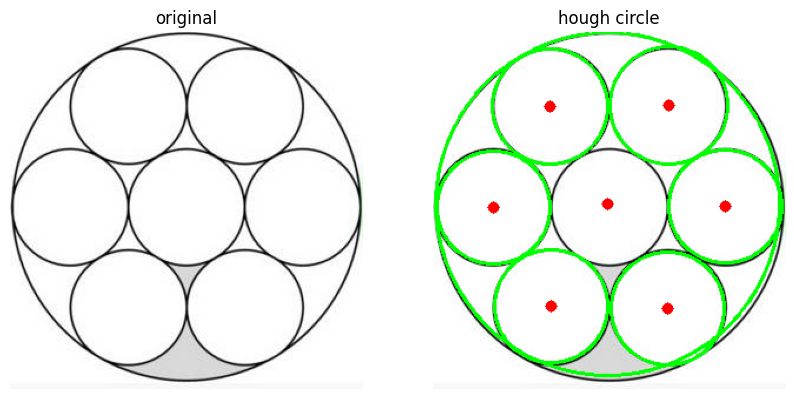

In [17]:
img = cv2.imread('./img/circles.png')
origin = img.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# blur = cv2.GaussianBlur(gray, (3,3), 0)
# circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.5, 30, None, 200)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, 40)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # 원 둘레
        cv2.circle(img, (i[0],i[1]), i[2], (0,255,0), 2)
        # 원의 중심
        cv2.circle(img, (i[0],i[1]), 2, (0,0,255), 5)

origin = cv2.cvtColor(origin, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10,6))
plt.subplot(121), plt.axis('off'), plt.imshow(origin), plt.title('original')
plt.subplot(122), plt.axis('off'), plt.imshow(img), plt.title('hough circle')
plt.show()

### 연속 영역 분할

(261, 411)
(261, 411)


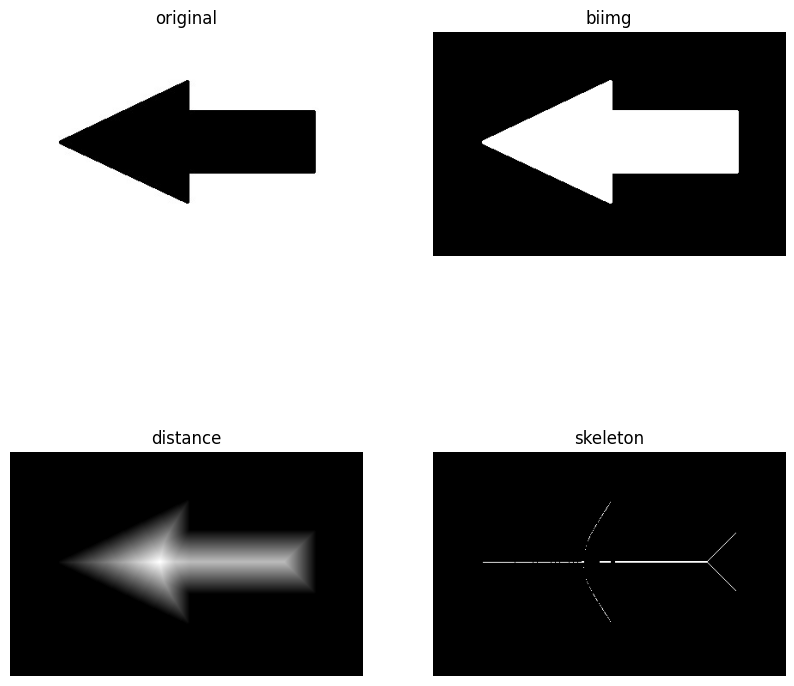

In [20]:
img = cv2.imread('./img/arrow.jpg', cv2.IMREAD_GRAYSCALE)
print(img.shape)
_, biimg = cv2.threshold(img, 127, 255,cv2.THRESH_BINARY_INV)

dst = cv2.distanceTransform(biimg, cv2.DIST_L2, 5)
# 정규화 0~255
dst = (dst/(dst.max()-dst.min())*255).astype(np.uint8)

skel = cv2.adaptiveThreshold(dst, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY, 7, -3)
print(skel.shape)

img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
biimg = cv2.cvtColor(biimg, cv2.COLOR_GRAY2RGB)
dst = cv2.cvtColor(dst, cv2.COLOR_GRAY2RGB)
skel = cv2.cvtColor(skel, cv2.COLOR_GRAY2RGB)

plt.figure(figsize=(10,10))
plt.subplot(221), plt.axis('off'), plt.imshow(img), plt.title('original')
plt.subplot(222), plt.axis('off'), plt.imshow(biimg), plt.title('biimg')
plt.subplot(223), plt.axis('off'), plt.imshow(dst), plt.title('distance')
plt.subplot(224), plt.axis('off'), plt.imshow(skel), plt.title('skeleton')
plt.show()

9


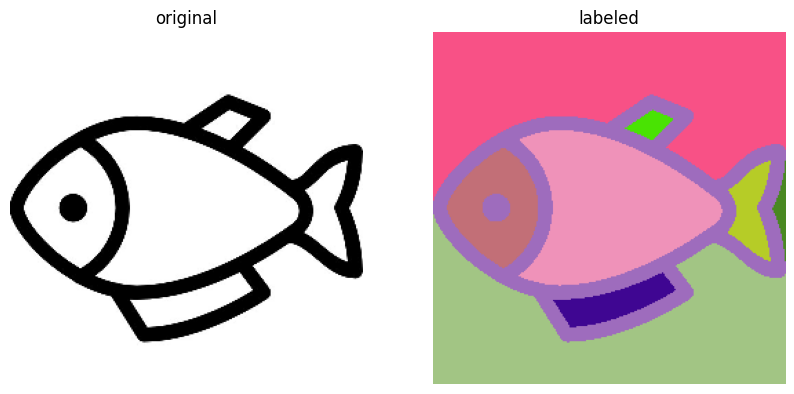

In [22]:
img = cv2.imread('./img/fish.jpg')
img2 = np.zeros_like(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

cnt, labels = cv2.connectedComponents(th)
print(cnt)

for i in range(cnt):
    img2[labels==i] = [int(j) for j in np.random.randint(0,255,3)] # (R, G, B) / [j1,j2,j3]

plt.figure(figsize=(10,10))
plt.subplot(121), plt.axis('off'), plt.imshow(img), plt.title('original')
plt.subplot(122), plt.axis('off'), plt.imshow(img2), plt.title('labeled')
plt.show()

In [26]:
img = cv2.imread('./img/taekwonv1.jpg')
img2 = img.copy()
rows, cols = img.shape[:2]

mask = np.zeros((rows+2,cols+2), np.uint8)
newVal = (255,255,255)  # 변경 할 색상
loDiff, upDiff = (10,10,10), (10,10,10)

def onMouse(event, x, y, flags, param):
    global mask, img2
    if event == cv2.EVENT_LBUTTONDOWN:
        seed = (x,y)
        retval = cv2.floodFill(img2, mask, seed, newVal, loDiff, upDiff)
        cv2.imshow('img', img2)

cv2.imshow('img', img2)
cv2.setMouseCallback('img', onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 워터 셰드

In [44]:
img = cv2.imread('./img/taekwonv1.jpg')
img_draw = img.copy()
marker = np.zeros(img.shape[:2], dtype=np.int32)
markerId = 1
colors = []
isDragging = False

def onMouse(event, x, y, flags, param):
    global img_draw, marker, markerId, isDragging
    if event == cv2.EVENT_LBUTTONDOWN:
        isDragging = True
        # 각 마커 아이디와 좌표의 색상 값을 Tuple 형태로 저장
        colors.append((markerId, img[y,x]))
    elif event == cv2.EVENT_MOUSEMOVE:
        if isDragging == True:
            # 마우스 좌표에 해당되는 마커의 좌표에 동일한 마커 아이디 넣기
            marker[y,x] = markerId
            cv2.circle(img_draw, (x,y), 3, (0,0,255), -1)
            cv2.imshow('watershed', img_draw)
    elif event == cv2.EVENT_LBUTTONUP:
        if isDragging:
            isDragging = False
            markerId +=1
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.watershed(img, marker)
        img_draw[marker == -1] = (0,255,0)
        for mid, color in colors:
            img_draw[marker==mid] = color
        cv2.imshow('watershed', img_draw)

cv2.imshow('watershed', img)
cv2.setMouseCallback('watershed', onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 그랩컷

In [56]:
img = cv2.imread('./img/taekwonv1.jpg')
img_draw = img.copy()
mask = np.zeros(img.shape[:2], dtype = np.uint8)
rect = [0,0,0,0]
mode = cv2.GC_EVAL
bgdmodel = np.zeros((1,65),np.float64)
fgdmodel = np.zeros((1,65),np.float64)

def onMouse(event,x,y,flags,param):
    global rect, mask, mode
    if event == cv2.EVENT_LBUTTONDOWN:
        if flags <= 1:   # 아무 키가 입력 안되었다면
            mode = cv2.GC_INIT_WITH_RECT     # 드래그 시작, 사각형 형태
            rect[:2] = x,y
    # isDragging 쓰지 않고 마우스 왼쪽 버튼 누르고 Drag
    elif event == cv2.EVENT_MOUSEMOVE and flags&cv2.EVENT_FLAG_LBUTTON:
        if mode == cv2.GC_INIT_WITH_RECT:
            img_temp = img.copy()
            cv2.rectangle(img_temp, (rect[0],rect[1]), (x,y), (0,255,0), 2)
            cv2.imshow('img', img_temp)
        elif flags > 1:   # 키가 눌렸을 때
            mode = cv2.GC_INIT_WITH_MASK
            if flags & cv2.EVENT_FLAG_CTRLKEY:    # 컨트롤 키 눌렸을때
                cv2.circle(img_draw, (x,y), 3, (255,255,255), -1)
                cv2.circle(mask, (x,y), 3, cv2.GC_FGD, -1)
            if flags & cv2.EVENT_FLAG_SHIFTKEY:
                cv2.circle(img_draw, (x,y), 3, (0,0,0), -1)
                cv2.circle(mask, (x,y), 3, cv2.GC_BGD, -1)
            cv2.imshow('img', img_draw)
    elif event == cv2.EVENT_LBUTTONUP:
        if mode == cv2.GC_INIT_WITH_RECT:
            rect[2:] = x, y
            cv2.rectangle(img_draw, (rect[0],rect[1]), (rect[2],rect[3]), (255,0,0), 2)
            cv2.imshow('img', img_draw)
        # 그랩컷
        cv2.grabCut(img, mask, tuple(rect), bgdmodel, fgdmodel, 1, mode)
        img2 = img.copy()
        # 확실한 배경 혹은 아마도 배경이면 표시된 영역을 0으로 채우기
        img2[(mask==cv2.GC_BGD) | (mask==cv2.GC_PR_BGD)] = 0
        cv2.imshow('grabcut', img2)
        mode = cv2.GC_EVAL

cv2.imshow('img', img)
cv2.setMouseCallback('img', onMouse)
while True:
    if cv2.waitKey(0) & 0xFF == 27:
        break
cv2.destroyAllWindows()
# 네모 그려서 객체 뽑고, 배경 같이 뽑혀져서 나오면 shift와 함께 눌러 배경으로 인식하도록
# 객체인데 안뽑히면 ctrl과 함께 객체로 인식하도록

In [58]:
img = cv2.imread('./img/taekwonv1.jpg')
mean = cv2.pyrMeanShiftFiltering(img, 30, 20, None, 3)
cv2.imshow('img', np.hstack((img, mean)))

# def onChange(x):
#     sp = cv2.getTrackbarPos('sp','img')
#     sr = cv2.getTrackbarPos('sr','img')
#     lv = cv2.getTrackbarPos('lv','img')

#     mean = cv2.pyrMeanShiftFiltering(img, sp, sr, None, lv)
#     cv2.imshow('img', np.hstack((img, mean)))

# cv2.imshow('img', np.hstack((img,img)))

# cv2.createTrackbar('sp','img',0,100,onChange)
# cv2.createTrackbar('sr','img',0,100,onChange)
# cv2.createTrackbar('lv','img',0,5,onChange)
cv2.waitKey(0)
cv2.destroyAllWindows()




# 이미지 매칭

In [60]:
img = cv2.imread('./img/pistol.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray = cv2.resize(gray, (16,16))
avg = gray.mean()
bin = 1 * (gray>avg)
print(bin)

cv2.namedWindow('pistol', cv2.WINDOW_GUI_NORMAL)
cv2.imshow('pistol', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1]
 [1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1]]


In [62]:
img = cv2.imread('./img/figures.jpg')
template = cv2.imread('./img/taekwonv1.jpg')
th, tw = template.shape[:2]
cv2.imshow('template', template)

methods = ['cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF_NORMED']
for i, mn in enumerate(methods):
    img_draw = img.copy()
    method = eval(mn)
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print(mn, min_val, max_val, min_loc, max_loc)
    if method == cv2.TM_SQDIFF_NORMED:
        top_left = min_loc
        match_val = min_val
    else:
        top_left = max_loc
        match_val = max_val
    bottom_right = (top_left[0] + tw, top_left[1] + th)
    cv2.rectangle(img_draw, top_left, bottom_right, (0,0,255), 2)
    cv2.putText(img_draw, str(match_val), top_left,
                cv2.FONT_HERSHEY_PLAIN, 2, (0,255,0), 1, cv2.LINE_AA)
    cv2.imshow(mn, img_draw)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.TM_CCOEFF_NORMED -0.1780252307653427 0.5131933093070984 (42, 0) (208, 43)
cv2.TM_CCORR_NORMED 0.827332615852356 0.9238022565841675 (85, 6) (208, 43)
cv2.TM_SQDIFF_NORMED 0.17028295993804932 0.36860838532447815 (208, 43) (86, 7)


# 이미지의 특징점

In [65]:
img = cv2.imread('./img/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corner = cv2.cornerHarris(gray, 2, 3, 0.04)
# 변화량의 결과의 최대값 10% 이상의 좌표 구하기
coord = np.where(corner > 0.1*corner.max())
coord = np.stack((coord[1],coord[0]), axis=-1)

for x,y in coord:
    cv2.circle(img,(x,y),5,(0,0,255),1, cv2.LINE_AA)

# 변화량을 표현하기 위한 작업
corner_norm = cv2.normalize(corner, None, 0, 255,cv2.NORM_MINMAX,cv2.CV_8U)

corner_norm = cv2.cvtColor(corner_norm, cv2.COLOR_GRAY2BGR)
merged = np.hstack((corner_norm, img))

cv2.imshow('Harris Corner', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [67]:
img = cv2.imread('./img/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, 200, 0.01, 10)
corners = np.int32(corners)

for corner in corners:
    x,y = corner[0]
    cv2.circle(img, (x,y), 5, (0,0,225), 1, cv2.LINE_AA)
cv2.imshow('ShiTomasi', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [69]:
img = cv2.imread('./img/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# GFTT 검출기 생성
gftt = cv2.GFTTDetector_create()
# 키포인트 검출
keypoints = gftt.detect(gray, None)
# 키포인트 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None)

cv2.imshow('GFTTDetector', img_draw)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [70]:
img = cv2.imread('./img/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 특징 검출기
fast = cv2.FastFeatureDetector_create(50)
# 키 포인트 검출
keypoints = fast.detect(gray, None)
# 키 포인트 그리기
img = cv2.drawKeypoints(img, keypoints, None)

cv2.imshow('FAST', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [75]:
img = cv2.imread('./img/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 파라미터 생성
params = cv2.SimpleBlobDetector_Params()
# 경계값 조정
params.minThreshold = 10
params.maxThreshold = 240
params.thresholdStep = 5
# 면적 필터
params.filterByArea = True
params.minArea = 200
# 나머지 필터 꺼주기 (False)
params.filterByColor = False
params.filterByConvexity = False
params.filterByCircularity = False
params.filterByInertia = False

# 필터 파라미터로 BLOB 검출
detector = cv2.SimpleBlobDetector_create(params)
# 키포인트 검출
keypoints = detector.detect(gray)
#키 포인트 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None, None,
                            cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('BLOB', img_draw)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 특징 스크립터

In [77]:
img = cv2.imread('./img/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# SIFT 추출기 생성
sift = cv2.xfeatures2d.SIFT_create()
keypoints, descriptor = sift.detectAndCompute(gray, None)
print('keypoint:', len(keypoints), ' descriptor:',descriptor.shape)
print(descriptor)

img_draw = cv2.drawKeypoints(img, keypoints, None,
                             flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('SIFT', img_draw)
cv2.waitKey(0)
cv2.destroyAllWindows()

keypoint: 413  descriptor: (413, 128)
[[  1.   1.   1. ...   0.   0.   1.]
 [  8.  24.   0. ...   1.   0.   4.]
 [  0.   0.   0. ...   0.   0.   2.]
 ...
 [  1.   8.  71. ...  73. 127.   3.]
 [ 35.   2.   7. ...   0.   0.   9.]
 [ 36.  34.   3. ...   0.   0.   1.]]


In [2]:
img = cv2.imread('./img/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ORB 추출기 생성
orb = cv2.ORB_create()
# 키 포인트 검출과 서술자 계산
keypoints, descriptor = orb.detectAndCompute(img, None)
# 키 포인트 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None,
                             flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow('ORB', img_draw)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
img1 = cv2.imread('./img/taekwonv1.jpg')
img2 = cv2.imread('./img/figures.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# SIFT 디텍터
detector = cv2.xfeatures2d.SIFT_create()
# 키포인트와 디스크립터
kp1, dsc1 = detector.detectAndCompute(gray1, None)
kp2, dsc2 = detector.detectAndCompute(gray2, None)
# BFMatcher, L1거리
matcher = cv2.BFMatcher(cv2.NORM_L1, crossCheck = True)
# 매칭 계산
matches = matcher.match(dsc1, dsc2)
# 매칭 결과 그려보기
res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None,
                      flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
cv2.imshow('BFMatcher+SIFT', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
# 디스크립터를 SIFT 말고 ORB로
img1 = cv2.imread('./img/taekwonv1.jpg')
img2 = cv2.imread('./img/figures.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# SIFT 디텍터 → ORB 디텍터
detector = cv2.ORB_create()
# 키포인트와 디스크립터
kp1, dsc1 = detector.detectAndCompute(gray1, None)
kp2, dsc2 = detector.detectAndCompute(gray2, None)
# BFMatcher, Hamming거리
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
# 매칭 계산
matches = matcher.match(dsc1, dsc2)
# 매칭 결과 그려보기
res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None,
                      flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
cv2.imshow('BFMatcher+ORB', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
img1 = cv2.imread('./img/taekwonv1.jpg')
img2 = cv2.imread('./img/figures2.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

detector = cv2.xfeatures2d.SIFT_create()

kp1, dsc1 = detector.detectAndCompute(gray1, None)
kp2, dsc2 = detector.detectAndCompute(gray2, None)

FLANN_INDEX_KDTREE = 1
# 딕셔너리 형태로 들어가는 Parameter들
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

matcher = cv2.FlannBasedMatcher(index_params, search_params)
matches = matcher.match(dsc1, dsc2)
res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None,
                      flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
cv2.imshow('Flann+SIFT',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
img1 = cv2.imread('./img/taekwonv1.jpg')
img2 = cv2.imread('./img/figures2.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

detector = cv2.ORB_create()

kp1, dsc1 = detector.detectAndCompute(gray1, None)
kp2, dsc2 = detector.detectAndCompute(gray2, None)

FLANN_INDEX_LSH = 6   # Locality-Sensitive Hashing: 2진 데이터로 Hamming 거리 계산
# 딕셔너리 형태로 들어가는 Parameter들
index_params = dict(algorithm=FLANN_INDEX_LSH,
                   table_number=6,
                   key_size=12,
                   multi_probe_level=1)
search_params = dict(checks=32)

matcher = cv2.FlannBasedMatcher(index_params, search_params)
matches = matcher.match(dsc1, dsc2)
res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None,
                      flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
cv2.imshow('Flann+ORB',res)
cv2.waitKey(0)
cv2.destroyAllWindows()